# This script performs text preprocessing and processing using the **NLTK** library.

![From: http://aishelf.org/nltk/](http://aishelf.org/wp-content/uploads/2020/08/nltk.png)

#### The text used is a desciption of Chanel N°5 perfume. This choice stems from the topic of *The Corpus of Fragrances* prepared together with Maja Grys and is used here with her permission.

In order to make the code easy to read, all imports are placed at the beginning.

In [240]:
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
import string

nltk.download('omw-1.4')
from nltk.corpus import wordnet

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer 

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\joann\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Firstly, the data is provided using **web scraping** techinque.

In [278]:
page = requests.get("https://www.notino.co.uk/chanel/no5-eau-de-parfum-for-women/")
#print(page.content)

In [280]:
soup = BeautifulSoup(page.content, 'html.parser')
#print(soup.prettify())

The code below **finds** all **paragraphs** in the text.

In [263]:
paragraphs = soup.find_all('p')
only_paragraphs = []
for paragraph in paragraphs:
    processed = paragraph.get_text()
    processed = processed.strip()
    if len(processed) > 1:
        only_paragraphs.append(processed)
        
print(only_paragraphs)

['A perfume with a capital P. A legend among fragrances. Luxury in a bottle. Chanel N°5 is that and so much more – the most famous fragrance of all time, favoured by many including the legendary Marilyn Monroe.', 'Enjoy the iconic fragrance which still hasn’t found its match even after decades since its first launch. Because quality, style, and feminine charm will never go out of fashion.', 'Composition of the fragranceFirst, you’ll notice aldehydes, ylang-yalng, neroli, and citrus notes. Then come the gentle notes of rose, lily of the valley, and jasmine. The whole composition rests on a base of amber, gourmand vanilla, and warm sandalwood with oriental notes of patchouli.', 'Story of the fragranceChanel N°5 Eau de Parfum for women was first introduced in 1921 by the famous Gabrielle “Coco” Chanel. Gabrielle wanted this fragrance to reflect her memories from her childhood in the French town of Aubazine. The chemist Ernest Beaux successfully created a few samples and Gabrielle especial

At this point, the list can be converted to a string to enable **tokenization** and **counting** of <ins>sentences and words</ins>.

In [264]:
text = ' '.join(only_paragraphs)
sentences = sent_tokenize(text)
text_without_punctuation = text.translate(str.maketrans('', '', string.punctuation))
words = word_tokenize(text_without_punctuation)
print("The number of sentences is", len(sentences), "and the number of words is", len(words))

average = round(len(words)/len(sentences))
print("The average number of tokens per sentence is",average)

The number of sentences is 26 and the number of words is 436
The average number of tokens per sentence is 17


The counting of tokens can also be performed after removing **stopwords**.

In [245]:
stop_words = set(stopwords.words('english'))
final_tokens = []
for token in words:
 if token not in stop_words:
    final_tokens.append(token)
print("The number of total tokens after removing stopwords are", len(final_tokens))

The number of total tokens after removing stopwords are 271


Having data in a string type, **named entities** can be extracted.

In [246]:
doc = nlp(text)
print([(word.text, word.label_) for word in doc.ents])

[('Chanel N', 'ORG'), ('5', 'CARDINAL'), ('Marilyn Monroe', 'PERSON'), ('decades', 'DATE'), ('first', 'ORDINAL'), ('neroli', 'GPE'), ('5 Eau de Parfum', 'ORG'), ('1921', 'DATE'), ('Gabrielle', 'ORG'), ('Gabrielle', 'PERSON'), ('French', 'NORP'), ('Aubazine', 'GPE'), ('Ernest Beaux', 'PERSON'), ('Gabrielle', 'ORG'), ('5', 'CARDINAL'), ('first', 'ORDINAL'), ('100', 'CARDINAL'), ('Chanle', 'NORP'), ('a hundred years', 'DATE'), ('Chanel N', 'ORG'), ('5', 'CARDINAL'), ('Chanel', 'ORG'), ('the Queen of Fashion', 'ORG'), ('Gabrielle Bonheur Chanel', 'PERSON'), ('1883', 'DATE'), ('Saumur', 'GPE'), ('France', 'GPE'), ('Paris', 'GPE'), ('Coco Chanel', 'ORG'), ('1912', 'DATE'), ('first', 'ORDINAL'), ('mid-20th-century', 'DATE'), ('Chanel', 'ORG'), ('Jacqueline Kennedy', 'PERSON'), ('Grace Kelly', 'PERSON'), ('Chanel', 'ORG'), ('Chanel', 'ORG'), ('Chanel No', 'ORG'), ('5', 'CARDINAL'), ('1921', 'DATE'), ('Chanel Chance', 'ORG'), ('Chanel Coco Mademoiselle', 'ORG'), ('Chanel', 'ORG'), ('Homme Sport

Next, tokens are **tagged** and the <ins>frequency of every tag</ins> is counted.

In [284]:
words_tagged = []
for paragraph in only_paragraphs:
    paragraph = paragraph.translate(str.maketrans('', '', string.punctuation))
    tokenized = nltk.word_tokenize(paragraph)
    tagged = nltk.pos_tag(tokenized)
    for item in tagged:
        words_tagged.append(item)

print("First 10 tagged words:", words_tagged[:10])

First 10 tagged words: [('A', 'DT'), ('perfume', 'NN'), ('with', 'IN'), ('a', 'DT'), ('capital', 'NN'), ('P', 'NNP'), ('A', 'NNP'), ('legend', 'NN'), ('among', 'IN'), ('fragrances', 'NNS')]


In [248]:
counted_tags = {}
for item in words_tagged:
    if item[1] not in counted_tags:
        counted_tags[item[1]] = 1
    else:
        counted_tags[item[1]] += 1

print(counted_tags)

{'DT': 48, 'NN': 71, 'IN': 59, 'NNP': 62, 'NNS': 24, 'JJ': 38, 'VBZ': 4, 'CC': 16, 'RB': 23, 'RBR': 1, 'RBS': 2, 'VBN': 7, 'VBG': 7, 'VB': 6, 'WDT': 2, 'VBD': 21, 'PRP$': 6, 'MD': 2, 'PRP': 12, 'VBP': 6, 'FW': 1, 'CD': 11, 'TO': 4, 'JJS': 1, 'WRB': 1, 'JJR': 1}


This code block visualizes the frequency of POS tags using **matplotlib**.

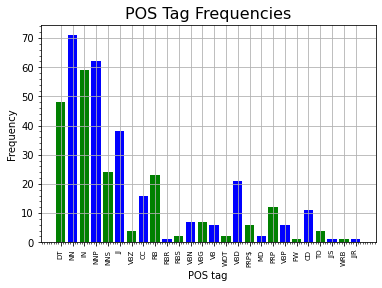

In [268]:
x = []
y = []
labels = []
i = 1
for k,v in counted_tags.items():
    x.append(i)
    y.append(v)
    labels.append(k)
    i += 1

plt.bar(x,y, color=('g','b'))
plt.title('POS Tag Frequencies', fontsize=16)
plt.xticks(x, labels)
plt.xlabel('POS tag')
plt.ylabel('Frequency')

plt.grid(True)
plt.minorticks_on()
plt.xticks(rotation=90, fontsize=7)

plt.show()

Below, **stemming** is performed by means of <ins>Snowball Stemmer</ins> algorithm.

In [276]:
stemmer = SnowballStemmer("english")   
stemmed_words = [stemmer.stem(word) for word in words]
#print("All Snowball stemmed words:", stemmed_words)
print("First 10 Snowball stemmed words:", stemmed_words[:10])

First 10 Snowball stemmed words: ['a', 'perfum', 'with', 'a', 'capit', 'p', 'a', 'legend', 'among', 'fragranc']


Lastly, **lemmatisation** can be done.

In [275]:
lemmatized_words = [lemmatizer.lemmatize(word, pos = "v") for word in words]
#print("All lemmatized words using a POS tag:", lemmatized_words)
print("First 10 lemmatized words using a POS tag:", lemmatized_words[:10])

First 10 lemmatized words using a POS tag: ['A', 'perfume', 'with', 'a', 'capital', 'P', 'A', 'legend', 'among', 'fragrances']


Additionally, NLTK library allows the user to work with, for instance, **WordNet**.

The code below shows synonyms of *pefume* and antonyms of *sweet*.

In [252]:
synonyms = []

for syn in wordnet.synsets("perfume"):
    for i in syn.lemmas():
        synonyms.append(i.name())

print(set(synonyms))

{'aromatize', 'essence', 'fragrance', 'aroma', 'scent', 'perfume', 'aromatise'}


As one can check [here](http://wordnetweb.princeton.edu/perl/webwn?s=perfume&sub=Search+WordNet&o2=&o0=1&o8=1&o1=1&o7=&o5=&o9=&o6=&o3=&o4=&h=), the results are alike.

In [253]:
antonyms = []

for syn in wordnet.synsets("sweet"):
    for i in syn.lemmas():
         if i.antonyms():
              antonyms.append(i.antonyms()[0].name())

print(set(antonyms))


{'salty', 'dry', 'sour'}
